## Description

**Start here if...**
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

**💡Getting Started Notebook**
To get started quickly, feel free to take advantage of this starter notebook.

**Competition Description**
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Data Description

| Field Name       | Description                                             |
|------------------|---------------------------------------------------------|
| SalePrice        | The property's sale price in dollars (target variable)   |
| MSSubClass       | The building class                                       |
| MSZoning         | The general zoning classification                        |
| LotFrontage      | Linear feet of street connected to property              |
| LotArea          | Lot size in square feet                                  |
| Street           | Type of road access                                      |
| Alley            | Type of alley access                                     |
| LotShape         | General shape of property                                |
| LandContour      | Flatness of the property                                 |
| Utilities        | Type of utilities available                              |
| LotConfig        | Lot configuration                                        |
| LandSlope        | Slope of property                                        |
| Neighborhood     | Physical locations within Ames city limits               |
| Condition1       | Proximity to main road or railroad                       |
| Condition2       | Proximity to main road or railroad (if a second is present)|
| BldgType         | Type of dwelling                                         |
| HouseStyle       | Style of dwelling                                        |
| OverallQual      | Overall material and finish quality                      |
| OverallCond      | Overall condition rating                                 |
| YearBuilt        | Original construction date                               |
| YearRemodAdd     | Remodel date                                             |
| RoofStyle        | Type of roof                                             |
| RoofMatl         | Roof material                                            |
| Exterior1st      | Exterior covering on house                               |
| Exterior2nd      | Exterior covering on house (if more than one material)   |
| MasVnrType       | Masonry veneer type                                      |
| MasVnrArea       | Masonry veneer area in square feet                       |
| ExterQual        | Exterior material quality                                |
| ExterCond        | Present condition of the material on the exterior        |
| Foundation       | Type of foundation                                       |
| BsmtQual         | Height of the basement                                   |
| BsmtCond         | General condition of the basement                        |
| BsmtExposure     | Walkout or garden level basement walls                   |
| BsmtFinType1     | Quality of basement finished area                        |
| BsmtFinSF1       | Type 1 finished square feet                              |
| BsmtFinType2     | Quality of second finished area (if present)             |
| BsmtFinSF2       | Type 2 finished square feet                              |
| BsmtUnfSF        | Unfinished square feet of basement area                  |
| TotalBsmtSF      | Total square feet of basement area                       |
| Heating          | Type of heating                                          |
| HeatingQC        | Heating quality and condition                            |
| CentralAir       | Central air conditioning                                 |
| Electrical       | Electrical system                                        |
| 1stFlrSF         | First floor square feet                                  |
| 2ndFlrSF         | Second floor square feet                                 |
| LowQualFinSF     | Low quality finished square feet (all floors)            |
| GrLivArea        | Above grade (ground) living area square feet             |
| BsmtFullBath     | Basement full bathrooms                                  |
| BsmtHalfBath     | Basement half bathrooms                                  |
| FullBath         | Full bathrooms above grade                               |
| HalfBath         | Half baths above grade                                   |
| Bedroom          | Number of bedrooms above basement level                  |
| Kitchen          | Number of kitchens                                       |
| KitchenQual      | Kitchen quality                                          |
| TotRmsAbvGrd     | Total rooms above grade (does not include bathrooms)     |
| Functional       | Home functionality rating                                |
| Fireplaces       | Number of fireplaces                                     |
| FireplaceQu      | Fireplace quality                                        |
| GarageType       | Garage location                                          |
| GarageYrBlt      | Year garage was built                                    |
| GarageFinish     | Interior finish of the garage                            |
| GarageCars       | Size of garage in car capacity                           |
| GarageArea       | Size of garage in square feet                            |
| GarageQual       | Garage quality                                           |
| GarageCond       | Garage condition                                         |
| PavedDrive       | Paved driveway                                           |
| WoodDeckSF       | Wood deck area in square feet                            |
| OpenPorchSF      | Open porch area in square feet                           |
| EnclosedPorch    | Enclosed porch area in square feet                       |
| 3SsnPorch        | Three season porch area in square feet                   |
| ScreenPorch      | Screen porch area in square feet                         |
| PoolArea         | Pool area in square feet                                 |
| PoolQC           | Pool quality                                             |
| Fence            | Fence quality                                            |
| MiscFeature      | Miscellaneous feature not covered in other categories    |
| MiscVal          | Value of miscellaneous feature                           |
| MoSold           | Month sold                                               |
| YrSold           | Year sold                                                |
| SaleType         | Type of sale                                             |
| SaleCondition    | Condition of sale                                        |

In [3]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [4]:
# Load data
train_df = pd.read_csv('/Users/youknowjp/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/youknowjp/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [5]:
# Print first 5 rows of the train data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Check for missing values and ambiguity in the data
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing, test_missing

(Id                 0
 MSSubClass         0
 MSZoning           0
 LotFrontage      259
 LotArea            0
                 ... 
 MoSold             0
 YrSold             0
 SaleType           0
 SaleCondition      0
 SalePrice          0
 Length: 81, dtype: int64,
 Id                 0
 MSSubClass         0
 MSZoning           4
 LotFrontage      227
 LotArea            0
                 ... 
 MiscVal            0
 MoSold             0
 YrSold             0
 SaleType           1
 SaleCondition      0
 Length: 80, dtype: int64)

## Ambiguities or Issues:

**High Missing Values:** Several columns such as Alley, FireplaceQu, PoolQC, Fence, and MiscFeature have a high number of missing values, which might need imputation or consideration for removal if not significant for the analysis.

**Columns with Few Missing Values:** Columns with a few missing values can be imputed using methods like mean, median, or mode for numerical features and the most frequent value for categorical features.

**Different Column Counts:** The train dataset has one additional column, SalePrice, which is expected since it is the target variable. This is not an issue but should be noted for clarity.

**Tackle issue:** Will address the issue in the machine learning model

       Feature1     Feature2  Correlation
0      1stFlrSF  TotalBsmtSF     0.819530
1  TotRmsAbvGrd    GrLivArea     0.825489
2   GarageYrBlt    YearBuilt     0.825667
3    GarageArea   GarageCars     0.882475
4     SalePrice  OverallQual     0.790982
5     SalePrice    GrLivArea     0.708624


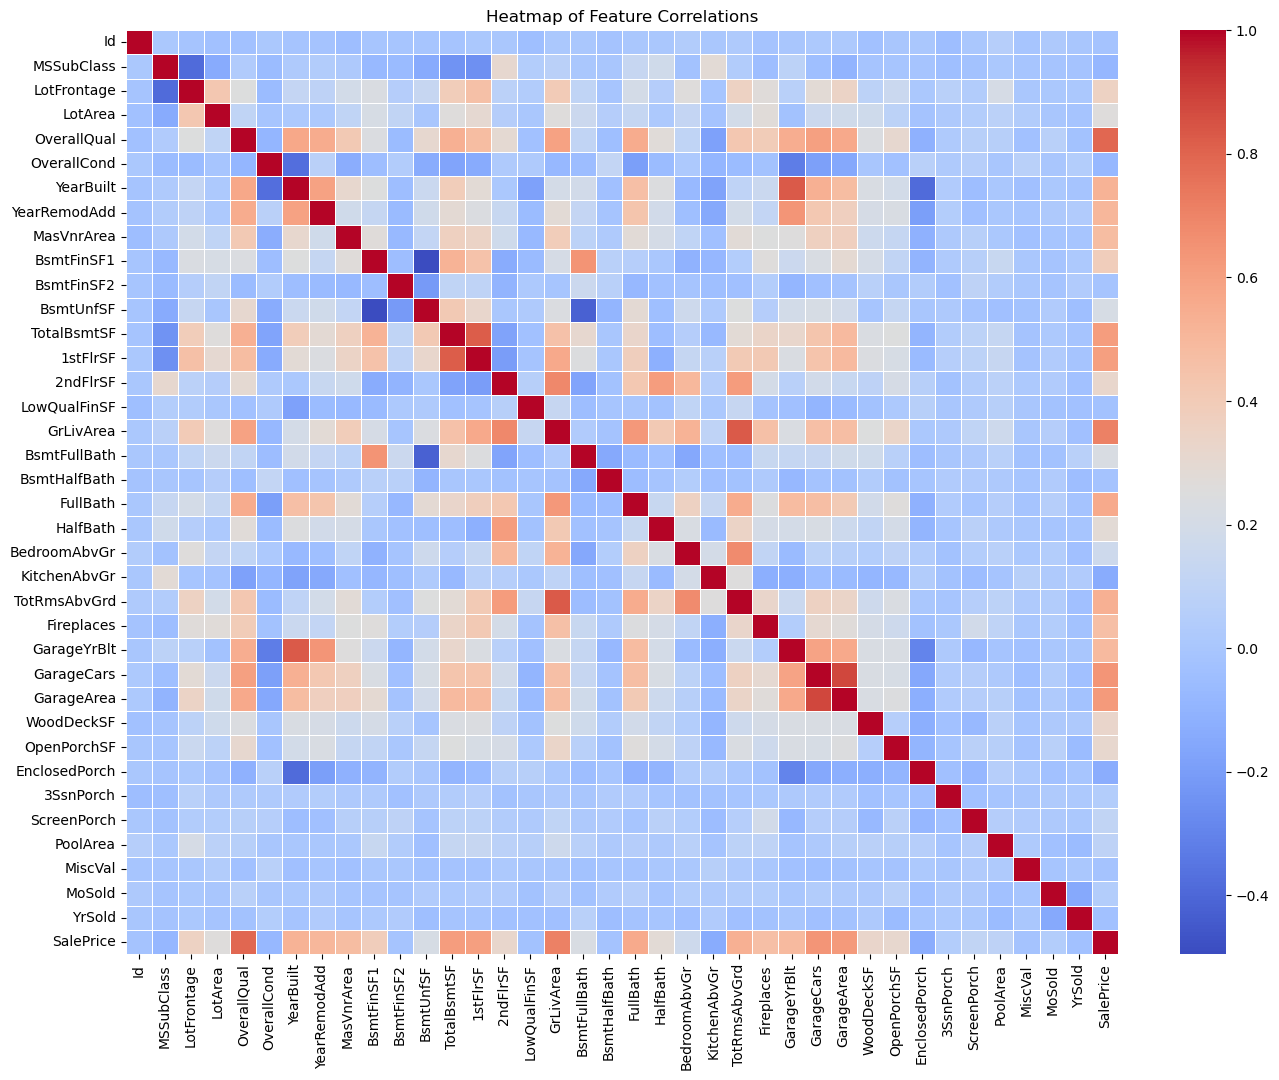

In [8]:
# Ensure that only numeric columns are included
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Identify pairs of highly correlated features
high_corr_threshold = 0.7
high_corr_pairs = []

# Iterate through the correlation matrix and find pairs above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Create a DataFrame from the list of high correlation pairs
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])

# Display the DataFrame
print(high_corr_pairs_df)

# Plot the heatmap for visualization
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

## Heat map analysis

|    Feature 1    |   Feature 2   | Correlation | Analysis                                                                                     |
|:---------------:|:-------------:|:-----------:|----------------------------------------------------------------------------------------------|
|     1stFlrSF    |  TotalBsmtSF  |   0.819530  | Larger first floors tend to accompany larger basement areas, reflecting overall house size.  |
|  TotRmsAbvGrd   |   GrLivArea   |   0.825489  | Houses with more rooms generally have a larger living area.                                  |
|   GarageYrBlt   |   YearBuilt   |   0.825667  | The year the house was built is closely related to the year the garage was built.            |
|   GarageArea    |  GarageCars   |   0.882475  | The size of the garage is strongly related to the number of cars it can accommodate.         |
|    SalePrice    |  OverallQual  |   0.790982  | Houses with higher overall quality tend to sell for higher prices.                           |
|    SalePrice    |   GrLivArea   |   0.708624  | Larger living areas are associated with higher sale prices.                                  |